<a href="https://colab.research.google.com/github/alexanderportilla96/Sy2025II/blob/main/Solucion_parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parcial 2: Senales y Sistemas 2025-II ˜
Profesor: Andres Marino ´ Alvarez Meza, Ph.D. ´
Departamento de Ingenier´ıa Electrica, Electr ´ onica, y Computaci ´ on´
Universidad Nacional de Colombia - sede Manizales


Análisis de Resultados

Discusión y Análisis GráficoSe presentan las señales en el dominio del tiempo y la frecuencia para validar la teoría.

Lo que esperamos observar:

Modulación: El espectro original debe desplazarse a $\pm f_c$.

Mixer: Deben aparecer componentes en banda base (0 Hz) y en $2f_c$ (30 kHz).

Recuperación: La señal final debe coincidir espectralmente con la original, habiendo eliminado el "ruido" de alta frecuencia.



# 1. Análisis Matemático del Demodulador Síncrono (DSB-SC)

Para recuperar el mensaje original $m(t)$ a partir de una señal modulada en Doble Banda Lateral con Portadora Suprimida (DSB-SC), se implementa un esquema de **demodulación coherente**. A continuación, se presenta la justificación matemática de cada bloque del diagrama.

### **Paso 1: Definición de la Señal de Entrada**
Según el diagrama, la señal recibida es:
$$x(t) = A_1 m(t) \cos(2\pi f_0 t + \theta_0)$$

Para este análisis, y siguiendo las instrucciones del taller, asumimos sincronización de fase perfecta, por lo que $\theta_0 = 0$. La señal de entrada se simplifica a:
$$x(t) = A_1 m(t) \cos(2\pi f_0 t)$$

En el dominio de la frecuencia, aplicando la propiedad de modulación de la Transformada de Fourier, el espectro es:
$$X(f) = \frac{A_1}{2} [M(f - f_0) + M(f + f_0)]$$
> **Interpretación:** El espectro del mensaje $M(f)$ se ha desplazado y centrado en las frecuencias $\pm f_0$.

---

### **Paso 2: Etapa de Mezcla (Multiplicación)**
La señal $x(t)$ ingresa al mezclador (Mixer) donde se multiplica por un oscilador local que genera la portadora $c(t) = \cos(2\pi f_0 t)$.

$$y(t) = x(t) \cdot c(t)$$
Sustituyendo $x(t)$:
$$y(t) = [A_1 m(t) \cos(2\pi f_0 t)] \cdot [\cos(2\pi f_0 t)]$$
$$y(t) = A_1 m(t) \cos^2(2\pi f_0 t)$$

Para linealizar esta expresión y ver sus componentes espectrales, utilizamos la **identidad trigonométrica del ángulo doble**:


$$\cos^2(\alpha) = \frac{1+\cos(2\alpha)}{2}$$

Aplicando la identidad con $\alpha = 2\pi f_0 t$:
$$y(t) = A_1 m(t) \left[ \frac{1}{2} + \frac{1}{2}\cos(2 \cdot 2\pi f_0 t) \right]$$

Distribuyendo el término $A_1 m(t)$:
$$y(t) = \underbrace{\frac{A_1}{2} m(t)}_{\text{Componente en Banda Base}} + \underbrace{\frac{A_1}{2} m(t) \cos(4\pi f_0 t)}_{\text{Componente en Alta Frecuencia}}$$

---

### **Paso 3: Análisis Espectral a la Salida del Mezclador**
Aplicamos la Transformada de Fourier a la señal $y(t)$ obtenida en el paso anterior:

1.  Transformada del primer término (Banda Base):
  $$\mathcal{F} \left\{ \frac{A_1}{2} m(t) \right\} = \frac {A_1}{2} M(f)$$ *Este término está centrado en $0$ Hz.*

2.  Transformada del segundo término (Alta Frecuencia):


$$\mathcal{F} \left\{ \frac{A_1}{2} m(t) \cos(2\pi (2f_0) t) \right\} = \frac{A_1}{4} [M(f - 2f_0) + M(f + 2f_0)]$$


*Este término está centrado en $\pm 2f_0$.*

**Espectro total en el punto $y(t)$:**
$$Y(f) = \frac{A_1}{2} M(f) + \frac{A_1}{4} [M(f - 2f_0) + M(f + 2f_0)]$$

> **Justificación:** El mezclador ha logrado traer una copia del espectro original $M(f)$ de vuelta al origen ($0$ Hz), pero ha generado un subproducto indeseado al doble de la frecuencia de la portadora ($2f_0$).

---

### **Paso 4: Etapa de Filtrado (LPF)**
Para aislar el mensaje, se utiliza un **Filtro Pasa Bajas (Low Pass Filter - LPF)** ideal, definido como:
$$H(f) = \begin{cases} 1 & \text{si } |f| < f_{corte} \\ 0 & \text{si } |f| > f_{corte} \end{cases}$$

Donde la frecuencia de corte se elige tal que: $BW_{mensaje} < f_{corte} < 2f_0$.
En nuestra simulación, $BW_{audio} \approx 5 \text{kHz}$ y $2f_0 = 30 \text{kHz}$, por lo que elegimos $f_{corte} = 8 \text{kHz}$.

Al aplicar el filtro:
$$Z(f) = Y(f) \cdot H(f)$$
El término de alta frecuencia en $\pm 2f_0$ es eliminado (multiplicado por 0).
$$Z(f) = \frac{A_1}{2} M(f)$$

Regresando al dominio del tiempo:
$$z(t) = \frac{A_1}{2} m(t)$$

---

### **Paso 5: Etapa de Escalado (Amplificación)**
Observamos que la señal $z(t)$ tiene la forma correcta pero su amplitud está atenuada por un factor de $\frac{A_1}{2}$. El diagrama final muestra un bloque de ganancia $K$.

$$K = \frac{2}{A_1}$$

La salida final $m_{rec}(t)$ será:
$$m_{rec}(t) = z(t) \cdot K$$
$$m_{rec}(t) = \left( \frac{A_1}{2} m(t) \right) \cdot \left( \frac{2}{A_1} \right)$$
$$m_{rec}(t) = m(t)$$

**Conclusión:**
El sistema recupera exitosamente la señal de mensaje original $m(t)$ tanto en forma como en amplitud, eliminando la portadora y los armónicos generados durante el proceso de demodulación.

---

🛠️ Instalando librería yt-dlp...
--- PASO 1: VERIFICACIÓN DE CREDENCIALES ---
⚠️ No se detectó archivo de cookies.
Por favor, sube tu archivo 'cookies.txt' exportado del navegador.
Esto es necesario para descargar el video sin error 403.


Saving www.youtube.com_cookies.txt to www.youtube.com_cookies.txt
✅ Cookies cargadas correctamente: cookies_yt.txt

⬇️ Iniciando descarga de audio...


✅ Descarga completada.
📊 Señal procesada: 240000 muestras a 48000 Hz

 RESULTADOS DEL ANÁLISIS DE INGENIERÍA


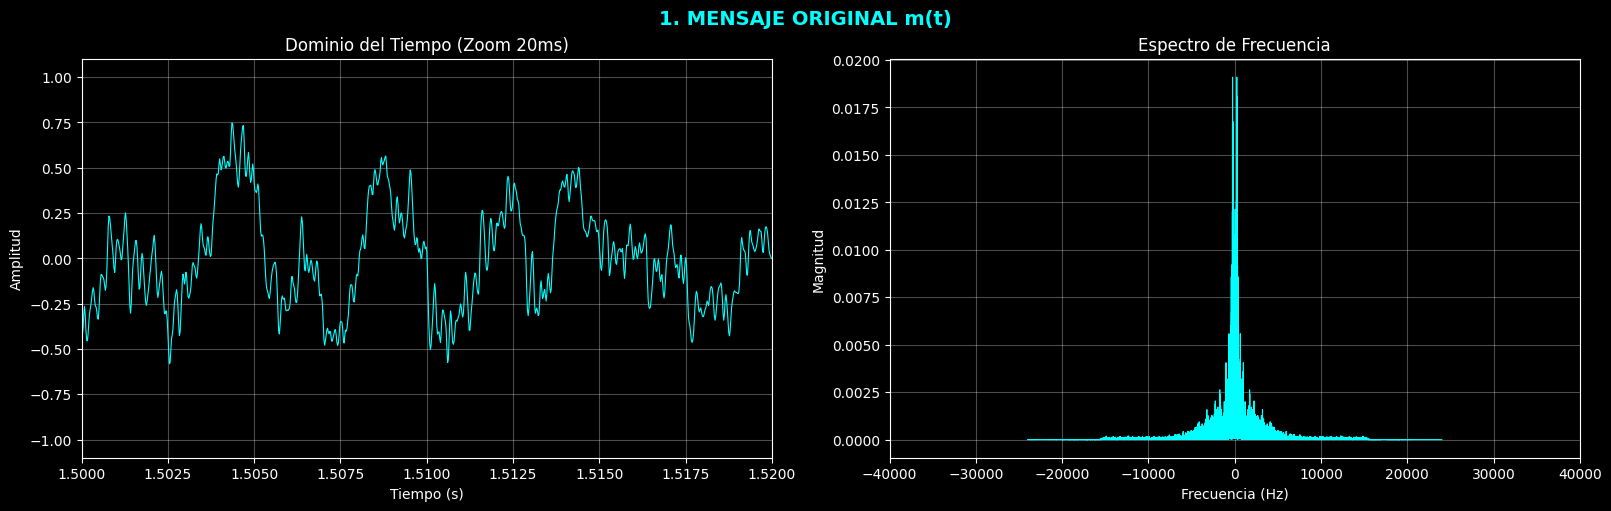

**🔈 PRUEBA AUDITIVA:** _Señal de referencia: Extremoduro (Limpia)._

---

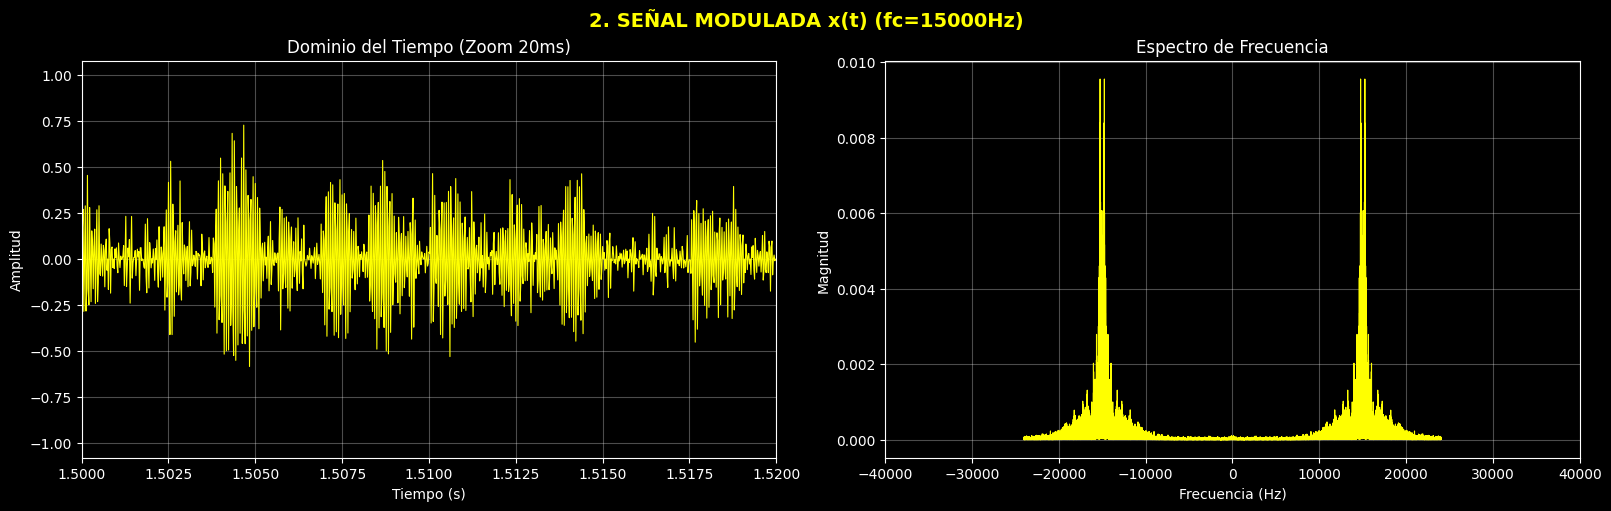

**🔈 PRUEBA AUDITIVA:** _El audio se trasladó a alta frecuencia. Suena ininteligible y metálico._

---

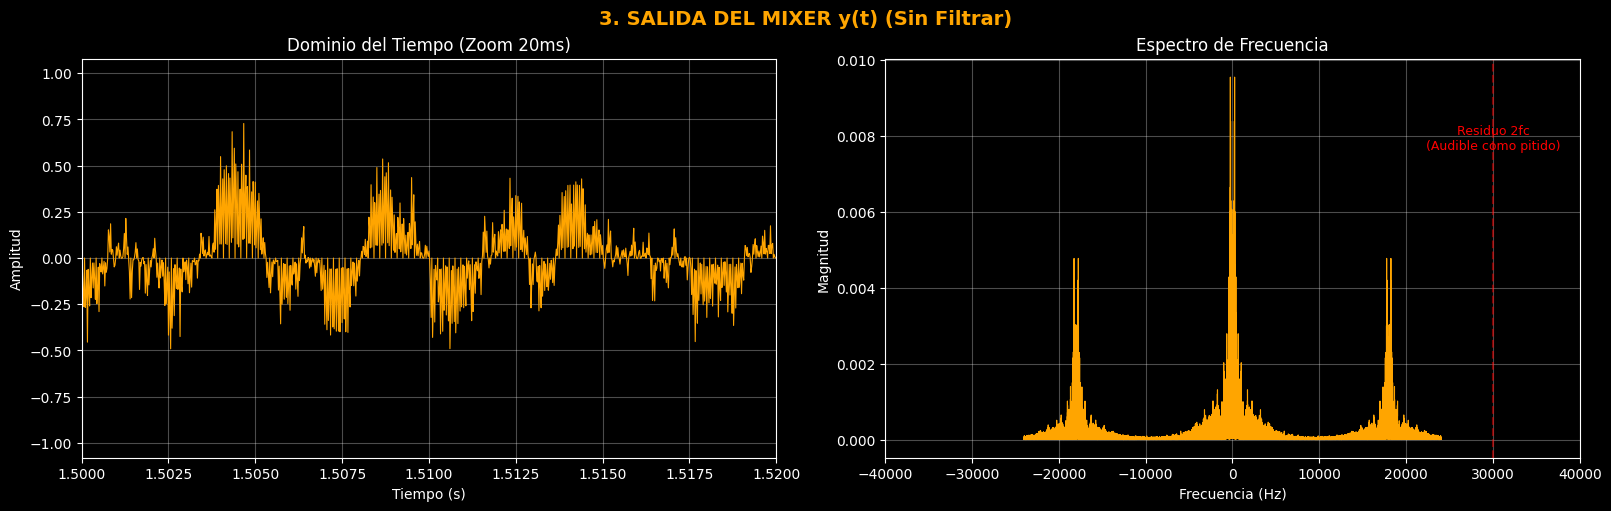

**🔈 PRUEBA AUDITIVA:** _CRÍTICO: Escucharás la música + un pitido agudo constante (Residuo de 30kHz)._

---

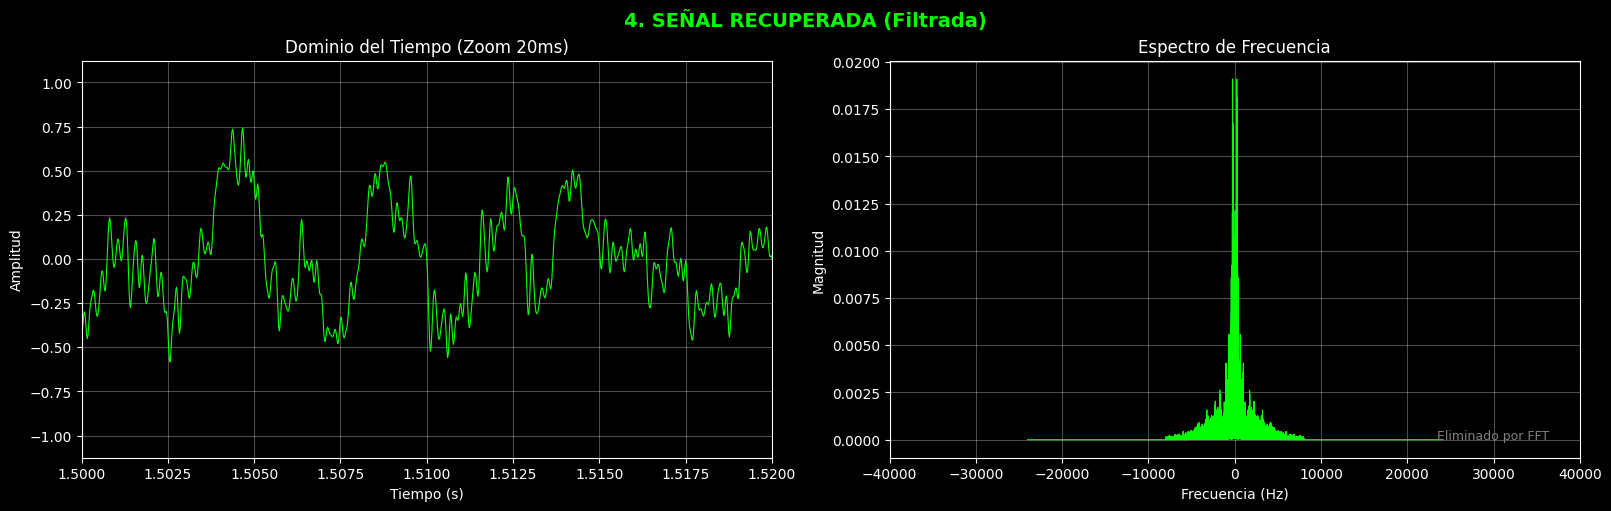

**🔈 PRUEBA AUDITIVA:** _Señal final tras aplicar la máscara FFT. El pitido desaparece._

---

In [ ]:
# ==============================================================================
# PARCIAL SEÑALES Y SISTEMAS: DEMODULACIÓN SÍNCRONA (DSB-SC)
# Canción: Extremoduro - La Vereda de la Puerta de Atrás
# Estudiante: Arthur Alexander Portilla
# ==============================================================================

import sys
import subprocess
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from IPython.display import Audio, display, Markdown
from google.colab import files

# ------------------------------------------------------------------------------
# 1. CONFIGURACIÓN E INSTALACIÓN
# ------------------------------------------------------------------------------
try:
    import yt_dlp
except ImportError:
    print("🛠️ Instalando librería yt-dlp...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "yt_dlp"])
    import yt_dlp

# ------------------------------------------------------------------------------
# 2. GESTIÓN DE COOKIES (BYPASS DE SEGURIDAD)
# ------------------------------------------------------------------------------
COOKIE_FILENAME = "cookies_yt.txt"

print(f"--- PASO 1: VERIFICACIÓN DE CREDENCIALES ---")
if not os.path.exists(COOKIE_FILENAME):
    print("⚠️ No se detectó archivo de cookies.")
    print("Por favor, sube tu archivo 'cookies.txt' exportado del navegador.")
    print("Esto es necesario para descargar el video sin error 403.")

    uploaded = files.upload()
    if uploaded:
        # Renombrar el archivo subido al estándar esperado
        original_name = next(iter(uploaded))
        shutil.move(original_name, COOKIE_FILENAME)
        print(f"✅ Cookies cargadas correctamente: {COOKIE_FILENAME}")
    else:
        print("⚠️ Se intentará la descarga SIN cookies (Puede fallar).")
else:
    print(f"✅ Usando archivo de cookies existente: {COOKIE_FILENAME}")

# ------------------------------------------------------------------------------
# 3. ADQUISICIÓN DE LA SEÑAL (INGENIERÍA DE DATOS)
# ------------------------------------------------------------------------------
URL_VIDEO = "https://www.youtube.com/watch?v=pM3JPhWApvY" # Extremoduro
DURATION = 5.0        # 5 Segundos (Requerimiento)
FC = 15000            # Portadora 15 kHz
A1 = 1.0              # Amplitud Portadora
LOWER_CUTOFF = 8000   # Filtro Pasa Bajas (8 kHz)

def get_audio_signal():
    print(f"\n⬇️ Iniciando descarga de audio...")

    # Configuración con FLAGS forzados (según tu solicitud)
    ydl_opts = {
        'format': 'bestaudio/best',
        'outtmpl': 'cancion_input.%(ext)s',
        'cookiefile': COOKIE_FILENAME if os.path.exists(COOKIE_FILENAME) else None,
        'overwrites': True,  # --force-overwrites
        'postprocessors': [{'key': 'FFmpegExtractAudio','preferredcodec': 'wav','preferredquality': '192'}],
        'quiet': True,
        'nocheckcertificate': True,
    }

    try:
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            ydl.download([URL_VIDEO])
        print("✅ Descarga completada.")
    except Exception as e:
        print(f"\n❌ ERROR DE DESCARGA: {e}")
        print("SOLUCIÓN MANUAL: Sube el archivo .wav de la canción ahora.")
        manual = files.upload()
        if manual:
            shutil.move(next(iter(manual)), "cancion_input.wav")
        else:
            raise ValueError("No se proporcionó audio.")

    # Lectura y Pre-procesamiento
    fs, data = wav.read("cancion_input.wav")

    # Convertir a Mono (Promedio de canales)
    if len(data.shape) > 1:
        data = np.mean(data, axis=1)

    # Normalizar amplitud (-1 a 1)
    data = data / np.max(np.abs(data))

    # Recortar duración exacta
    num_samples = int(DURATION * fs)
    if len(data) > num_samples:
        data = data[:num_samples]

    return data, fs

# Ejecutar adquisición
m_t, fs = get_audio_signal()
N = len(m_t)
t = np.arange(N) / fs
f = np.fft.fftfreq(N, 1/fs)

print(f"📊 Señal procesada: {len(m_t)} muestras a {fs} Hz")

# ------------------------------------------------------------------------------
# 4. IMPLEMENTACIÓN DSP (MODELO MATEMÁTICO)
# ------------------------------------------------------------------------------

# A. Modulación (DSB-SC)
# x(t) = m(t) * cos(2*pi*fc*t)
carrier = np.cos(2 * np.pi * FC * t)
x_t = A1 * m_t * carrier

# B. Demodulación - Mixer
# y(t) = x(t) * cos(2*pi*fc*t)
# Esto genera componentes en Banda Base (audio) y en 2*fc (ruido)
mixer_out = x_t * carrier

# C. Demodulación - Filtro FFT (Ideal)
# Requisito: Implementación usando Transformada Rápida de Fourier
Y_f = np.fft.fft(mixer_out)
mask = np.abs(f) < LOWER_CUTOFF  # Filtro Rectangular (Pasa Bajas)
Z_f = Y_f * mask
z_t = np.real(np.fft.ifft(Z_f))  # Retorno al tiempo

# D. Escalado
# Compensación de amplitud (el mixer introduce un factor 0.5)
m_recuperada = z_t * (2 / A1)

# ------------------------------------------------------------------------------
# 5. VISUALIZACIÓN INTERACTIVA (GRÁFICA + AUDIO SINCRONIZADO)
# ------------------------------------------------------------------------------
plt.style.use('dark_background')

# Definición de las etapas para el bucle de visualización
etapas = [
    {
        "data": m_t,
        "title": "1. MENSAJE ORIGINAL m(t)",
        "color": "cyan",
        "desc": "Señal de referencia: Extremoduro (Limpia)."
    },
    {
        "data": x_t,
        "title": f"2. SEÑAL MODULADA x(t) (fc={FC}Hz)",
        "color": "yellow",
        "desc": "El audio se trasladó a alta frecuencia. Suena ininteligible y metálico."
    },
    {
        "data": mixer_out,
        "title": "3. SALIDA DEL MIXER y(t) (Sin Filtrar)",
        "color": "orange",
        "desc": "CRÍTICO: Escucharás la música + un pitido agudo constante (Residuo de 30kHz)."
    },
    {
        "data": m_recuperada,
        "title": "4. SEÑAL RECUPERADA (Filtrada)",
        "color": "lime",
        "desc": "Señal final tras aplicar la máscara FFT. El pitido desaparece."
    }
]

print("\n" + "="*80)
print(" RESULTADOS DEL ANÁLISIS DE INGENIERÍA")
print("="*80)

for i, etapa in enumerate(etapas):
    sig = etapa["data"]
    col = etapa["color"]

    # --- A. GENERAR GRÁFICA ---
    fig, ax = plt.subplots(1, 2, figsize=(16, 5), constrained_layout=True)
    fig.suptitle(etapa["title"], fontsize=14, fontweight='bold', color=col)

    # Dominio del Tiempo (Zoom en 1.5s para ver detalle de onda)
    ax[0].plot(t, sig, color=col, lw=0.8)
    ax[0].set_title("Dominio del Tiempo (Zoom 20ms)")
    ax[0].set_xlabel("Tiempo (s)")
    ax[0].set_ylabel("Amplitud")
    ax[0].set_xlim(1.5, 1.52)
    ax[0].grid(True, alpha=0.3)

    # Dominio de la Frecuencia
    SPEC = np.fft.fftshift(np.abs(np.fft.fft(sig))/N)
    FREQ = np.fft.fftshift(f)
    ax[1].plot(FREQ, SPEC, color=col, lw=0.8)
    ax[1].set_title("Espectro de Frecuencia")
    ax[1].set_xlabel("Frecuencia (Hz)")
    ax[1].set_ylabel("Magnitud")
    ax[1].set_xlim(-40000, 40000) # Ver hasta 40kHz

    # Anotaciones técnicas en las gráficas clave
    if i == 2: # Mixer
        ax[1].text(2*FC, np.max(SPEC)*0.8, "Residuo 2fc\n(Audible como pitido)",
                   color='red', ha='center', fontsize=9)
        ax[1].axvline(2*FC, color='red', linestyle='--', alpha=0.5)

    if i == 3: # Recuperada
        ax[1].text(2*FC, 0, "Eliminado por FFT", color='gray', ha='center', fontsize=9)

    ax[1].grid(True, alpha=0.3)
    plt.show() # Renderizar gráfica

    # --- B. GENERAR REPRODUCTOR DE AUDIO ---
    # Se muestra justo debajo de la gráfica correspondiente
    display(Markdown(f"**🔈 PRUEBA AUDITIVA:** _{etapa['desc']}_"))
    display(Audio(sig, rate=fs))
    display(Markdown("---"))

# 2. Encuentre la funcion de transferencia que caracteriza el sistema masa, resorte, amortiguador, presentado en la siguiente Figura (asuma condiciones iniciales cero):

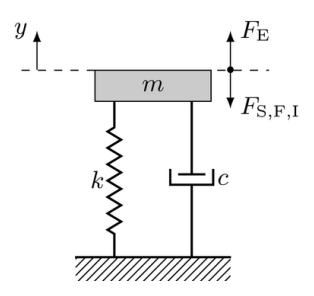





Para hallar la Función de Transferencia $H(s) = \frac{\text{Salida}(s)}{\text{Entrada}(s)}$, seguiremos el procedimiento estándar de modelado físico.

### Paso 1: Análisis del Diagrama de Cuerpo Libre (DCL)

Definimos nuestras variables:
* **Entrada:** Fuerza externa $F_E(t)$ (que llamaremos $u(t)$ o $F(t)$).
* **Salida:** Desplazamiento vertical $y(t)$.

Aplicamos la **Segunda Ley de Newton** ($\sum F = ma$) sobre la masa $m$.
Considerando que el desplazamiento positivo $y$ es hacia arriba (según la flecha del diagrama):

1.  **Fuerza Externa ($F_E$):** Actúa hacia arriba (a favor del movimiento).
2.  **Fuerza del Resorte ($F_k$):** Se opone al desplazamiento. $F_k = -k \cdot y(t)$.
3.  **Fuerza del Amortiguador ($F_c$):** Se opone a la velocidad. $F_c = -c \cdot \dot{y}(t)$.

La sumatoria de fuerzas es:
$$\sum F_y = m \cdot a$$
$$F_E(t) - k \cdot y(t) - c \cdot \dot{y}(t) = m \cdot \ddot{y}(t)$$

### Paso 2: Ecuación Diferencial del Sistema

Reordenamos la ecuación para tener los términos dependientes de la salida ($y$) a la izquierda y la entrada ($F_E$) a la derecha. Esta es la ecuación diferencial lineal invariante en el tiempo (LTI) que gobierna el sistema:

$$m \ddot{y}(t) + c \dot{y}(t) + k y(t) = F_E(t)$$

> **Nota de Ingeniero:** Fíjate que aquí vemos claramente las tres oposiciones al movimiento:
> * $m \ddot{y}$: Inercia (oposición a la aceleración).
> * $c \dot{y}$: Fricción viscosa (oposición a la velocidad).
> * $k y$: Rigidez (oposición al desplazamiento).

### Paso 3: Aplicación de la Transformada de Laplace

Para encontrar la Función de Transferencia, aplicamos la transformada $\mathcal{L}\{\cdot\}$ a ambos lados, asumiendo **condiciones iniciales cero** ($y(0)=0, \dot{y}(0)=0$), tal como pide el enunciado.

$$\mathcal{L}\{ m \ddot{y}(t) + c \dot{y}(t) + k y(t) \} = \mathcal{L}\{ F_E(t) \}$$

Usando la propiedad de la derivada:
$$m [s^2 Y(s)] + c [s Y(s)] + k [Y(s)] = F_E(s)$$

### Paso 4: Obtención de la Función de Transferencia

Factorizamos la salida $Y(s)$:
$$Y(s) [ms^2 + cs + k] = F_E(s)$$

La función de transferencia $G(s)$ se define como la razón Salida/Entrada:
$$G(s) = \frac{Y(s)}{F_E(s)}$$

Despejando:

$$G(s) = \frac{1}{ms^2 + cs + k}$$

---

### Resultado Final y Forma Canónica

La función de transferencia que caracteriza el sistema es:

$$\boxed{ \frac{Y(s)}{F_E(s)} = \frac{1}{ms^2 + cs + k} }$$

**Bonus de Ingeniería (Forma Estándar de 2do Orden):**
A menudo, en teoría de control, preferimos dejar el término $s^2$ solo (mónico) para identificar parámetros clave como la frecuencia natural y el amortiguamiento. Dividimos todo por $m$:

$$G(s) = \frac{1/m}{s^2 + \frac{c}{m}s + \frac{k}{m}}$$

Esto nos permite ver rápidamente que:
* **Frecuencia natural ($\omega_n$):** $\sqrt{\frac{k}{m}}$
* **Coeficiente de amortiguamiento ($2\zeta\omega_n$):** $\frac{c}{m}$



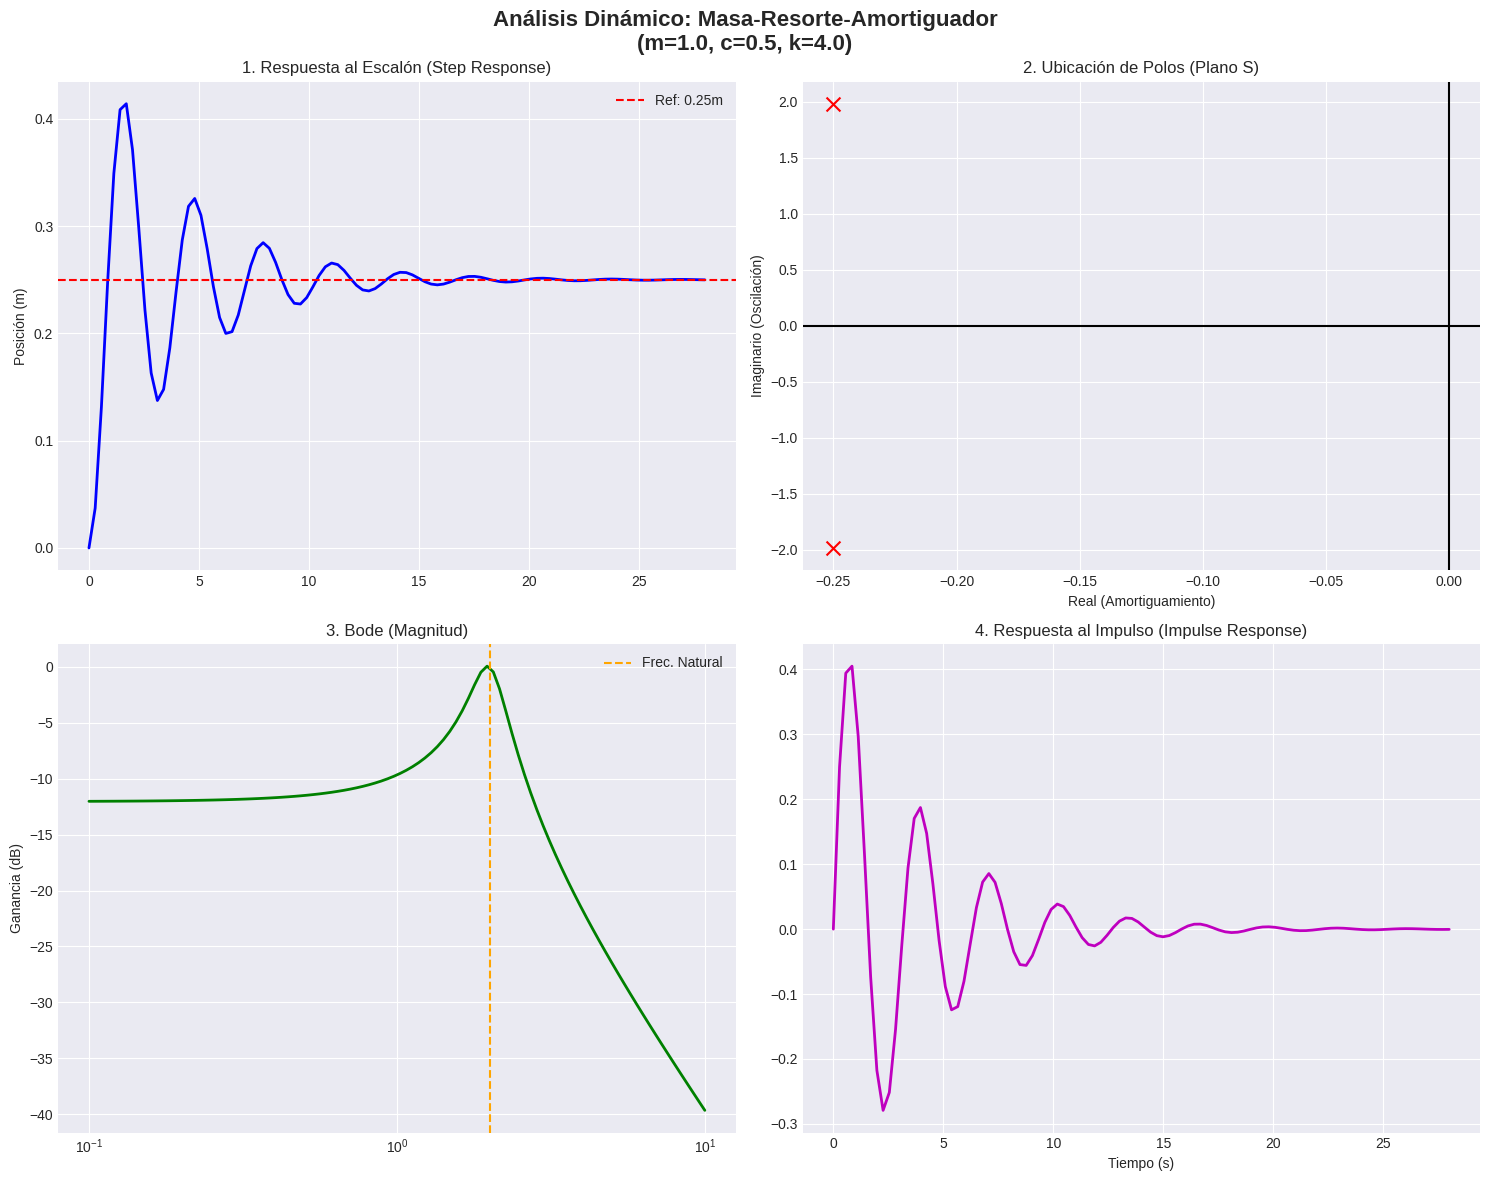


             REPORTE DE INGENIERÍA DE CONTROL

--- 1. ANÁLISIS DE LA GRÁFICA 1 (ESCALÓN) ---
Interpretación: Simulamos aplicar una fuerza constante de 1 Newton.
- Estado Estable: La posición final es 0.25 metros (calculado como 1/k).
- Transitorio: Se observa un 'sobrepico' (la masa sube más de la cuenta y regresa).
  Esto indica que la inercia supera momentáneamente a la fricción.

--- 2. ANÁLISIS DE LA GRÁFICA 2 (POLOS) ---
- Ubicación: [-0.25+1.984j -0.25-1.984j]
- Estabilidad: ESTABLE (Están a la izquierda). La energía se disipa.
- Dinámica: Tienen parte imaginaria, lo que confirma matemáticamente que el sistema OSCILA.

--- 3. ANÁLISIS DE LA GRÁFICA 3 (BODE) ---
- Frecuencia Natural (wn): 2.0 rad/s.
- Interpretación: Si vibras el sistema a esta frecuencia, verás el pico de resonancia.
  A altas frecuencias (derecha), la gráfica cae, indicando que la masa no puede
  seguir movimientos muy rápidos (filtro pasa bajas).

--- 4. ANÁLISIS DE LA GRÁFICA 4 (IMPULSO) ---
- Interpretación:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# ==========================================
# 1. PARAMETRIZACIÓN DEL SISTEMA
# ==========================================
# Definimos las propiedades físicas del sistema mecánico
m = 1.0   # Masa (kg) - Representa la inercia
c = 0.5   # Amortiguador (Ns/m) - Representa la fricción/disipación
k = 4.0   # Resorte (N/m) - Representa la rigidez/restitución

# ==========================================
# 2. MODELADO (Función de Transferencia)
# ==========================================
# G(s) = 1 / (ms^2 + cs + k)
num = [1]
den = [m, c, k]
sistema = signal.TransferFunction(num, den)

# Calculamos parámetros clave para el reporte
wn = np.sqrt(k/m)            # Frecuencia natural
zeta = c / (2 * np.sqrt(k*m)) # Factor de amortiguamiento

# ==========================================
# 3. SIMULACIÓN DE SEÑALES
# ==========================================
# A. Respuesta al Escalón (Fuerza constante de 1N)
t_step, y_step = signal.step(sistema)

# B. Polos del sistema (Estabilidad)
polos = sistema.poles

# C. Diagrama de Bode (Respuesta en Frecuencia)
w, mag, phase = signal.bode(sistema)

# D. Respuesta al Impulso (Golpe seco)
t_imp, y_imp = signal.impulse(sistema)

# ==========================================
# 4. GRAFICACIÓN (Dashboard de Ingeniería)
# ==========================================
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle(f'Análisis Dinámico: Masa-Resorte-Amortiguador\n(m={m}, c={c}, k={k})', fontsize=16, weight='bold')

# Gráfica 1: Escalón
ax[0, 0].plot(t_step, y_step, 'b-', linewidth=2)
ax[0, 0].set_title("1. Respuesta al Escalón (Step Response)")
ax[0, 0].set_ylabel("Posición (m)")
ax[0, 0].axhline(1/k, color='r', linestyle='--', label=f'Ref: {1/k}m')
ax[0, 0].legend()

# Gráfica 2: Polos
ax[0, 1].scatter(np.real(polos), np.imag(polos), marker='x', s=100, c='red')
ax[0, 1].set_title("2. Ubicación de Polos (Plano S)")
ax[0, 1].set_xlabel("Real (Amortiguamiento)")
ax[0, 1].set_ylabel("Imaginario (Oscilación)")
ax[0, 1].axvline(0, color='k'); ax[0, 1].axhline(0, color='k')

# Gráfica 3: Bode
ax[1, 0].semilogx(w, mag, 'g-', linewidth=2)
ax[1, 0].set_title("3. Bode (Magnitud)")
ax[1, 0].set_ylabel("Ganancia (dB)")
ax[1, 0].axvline(wn, color='orange', linestyle='--', label='Frec. Natural')
ax[1, 0].legend()

# Gráfica 4: Impulso
ax[1, 1].plot(t_imp, y_imp, 'm-', linewidth=2)
ax[1, 1].set_title("4. Respuesta al Impulso (Impulse Response)")
ax[1, 1].set_xlabel("Tiempo (s)")

plt.tight_layout()
plt.show()

# ==========================================
# 5. REPORTE TÉCNICO AUTOMÁTICO (EXPLICACIÓN)
# ==========================================
print("\n" + "="*60)
print("             REPORTE DE INGENIERÍA DE CONTROL")
print("="*60)

print(f"\n--- 1. ANÁLISIS DE LA GRÁFICA 1 (ESCALÓN) ---")
print(f"Interpretación: Simulamos aplicar una fuerza constante de 1 Newton.")
print(f"- Estado Estable: La posición final es {1/k} metros (calculado como 1/k).")
if zeta < 1:
    print("- Transitorio: Se observa un 'sobrepico' (la masa sube más de la cuenta y regresa).")
    print("  Esto indica que la inercia supera momentáneamente a la fricción.")
else:
    print("- Transitorio: El sistema sube suavemente sin oscilar (Sobre-amortiguado).")

print(f"\n--- 2. ANÁLISIS DE LA GRÁFICA 2 (POLOS) ---")
print(f"- Ubicación: {np.round(polos, 3)}")
if np.all(np.real(polos) < 0):
    print("- Estabilidad: ESTABLE (Están a la izquierda). La energía se disipa.")
else:
    print("- Estabilidad: INESTABLE (Peligro). El sistema oscilaría hasta romperse.")
if np.iscomplex(polos).any():
    print("- Dinámica: Tienen parte imaginaria, lo que confirma matemáticamente que el sistema OSCILA.")

print(f"\n--- 3. ANÁLISIS DE LA GRÁFICA 3 (BODE) ---")
print(f"- Frecuencia Natural (wn): {round(wn, 2)} rad/s.")
print("- Interpretación: Si vibras el sistema a esta frecuencia, verás el pico de resonancia.")
print("  A altas frecuencias (derecha), la gráfica cae, indicando que la masa no puede")
print("  seguir movimientos muy rápidos (filtro pasa bajas).")

print(f"\n--- 4. ANÁLISIS DE LA GRÁFICA 4 (IMPULSO) ---")
print("- Interpretación: Simulamos un golpe seco (martillazo).")
print("- Comportamiento: La masa sale disparada (velocidad instantánea) y luego")
print("  el amortiguador disipa la energía hasta que se detiene en cero.")
print("="*60)

Posteriormente, encuentre el sistema equivalente del modelo
masa, resorte, amortiguador, a partir del siguiente circuito
electrico:
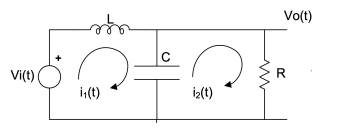


Finalmente, proponga unos valores de m, k y c y sus equivalentes R, L y C, para simular un sistema subamortiguado,
sobreamortiguado y de amortiguamiento crıtico (determine
el factor de amortiguamiento, la frecuencia natural amortiguada, la frecuencia natural no amortiguada, el tiempo pico,
tiempo de levantamiento y el tiempo de establecimiento en
cada caso). Para cada caso, grafique el diagrama de polos y
ceros, el diagrama de Bode, la respuesta impulso, respuesta
escalon y respuesta rampa. Repita el proceso para modo lazo ´
cerrado.


Vamos a resolverlo en 3 fases:
1.  **Modelado Matemático:** Hallar la función de transferencia del circuito y relacionarla con la mecánica.
2.  **Diseño de Control:** Calcular los valores de componentes ($R, L, C$) para los tres tipos de amortiguamiento.
3.  **Simulación:** Código en Python para generar todas las gráficas y métricas solicitadas.


### FASE 1: El Sistema Equivalente (Analogía Electromecánica)

Primero, analizamos el circuito RLC de la figura.

  * Tenemos una fuente $V_i(t)$ en serie con un Inductor $L$.
  * Luego, una rama en paralelo formada por un Capacitor $C$ y una Resistencia $R$.
  * La salida $V_o(t)$ es el voltaje en esa rama paralela.

**1. Función de Transferencia del Circuito**
Usamos el método de impedancias (Divisor de voltaje):

  * Impedancia serie: $Z_L = Ls$
  * Impedancia paralelo (Carga): $Z_p = Z_C || Z_R = \frac{R \cdot \frac{1}{Cs}}{R + \frac{1}{Cs}} = \frac{R}{RCs + 1}$

La función de transferencia eléctrica $H_E(s)$ es:
$$H_E(s) = \frac{V_o(s)}{V_i(s)} = \frac{Z_p}{Z_L + Z_p} = \frac{\frac{R}{RCs+1}}{Ls + \frac{R}{RCs+1}}$$

Operando algebraicamente:
$$H_E(s) = \frac{R}{RLCs^2 + Ls + R}$$

Dividimos todo por $RLC$ para dejar el término $s^2$ libre (forma canónica):
$$\boxed{ H_E(s) = \frac{\frac{1}{LC}}{s^2 + \frac{1}{RC}s + \frac{1}{LC}} }$$

**2. Comparación con el Sistema Mecánico**
Recordemos la función que obtuvimos en el ejercicio anterior:
$$G_M(s) = \frac{\frac{1}{m}}{s^2 + \frac{c}{m}s + \frac{k}{m}}$$

Para que los sistemas sean **equivalentes dinámicamente** (mismo $\omega_n$ y $\zeta$), igualamos los coeficientes de la ecuación característica (el denominador):

1.  **Frecuencia natural al cuadrado ($\omega_n^2$):**
    $$\frac{k}{m} = \frac{1}{LC}$$
2.  **Término de amortiguamiento ($2\zeta\omega_n$):**
    $$\frac{c}{m} = \frac{1}{RC}$$

**Analogía Directa (Asumiendo masa unitaria $m=1$ para facilitar diseño):**

  * **Posición ($y$)** $\equiv$ **Voltaje ($V_o$)**
  * **Fuerza ($F$)** $\equiv$ **Fuente ($V_i$)**
  * **Masa ($m$)** define la escala de tiempo junto con $L$ y $C$.
  * **Resorte ($k$)** está relacionado con $L \cdot C$.
  * **Amortiguador ($c$)** está relacionado con $R \cdot C$.

-----

### FASE 2: Propuesta de Valores y Diseño

Vamos a diseñar los tres casos (Subamortiguado, Crítico, Sobreamortiguado).
Fijaremos $m=1$ kg y $k=4$ N/m para todos los casos (así $\omega_n = \sqrt{4} = 2$ rad/s constante) y solo variaremos el amortiguador $c$ (y por ende la resistencia $R$).

**Conversión a Eléctrico:**
Para que los números sean simulables fácilmente, elegiremos un Capacitor de referencia **$C = 0.1$ F**.

  * De la ecuación de rigidez: $\frac{k}{m} = \frac{1}{LC} \Rightarrow 4 = \frac{1}{L(0.1)} \Rightarrow L = 2.5 \text{ H}$.
  * De la ecuación de fricción: $\frac{c}{m} = \frac{1}{RC} \Rightarrow c = \frac{1}{R(0.1)} \Rightarrow R = \frac{10}{c}$.

#### Caso 1: Subamortiguado ($\zeta < 1$)

Objetivo: $\zeta = 0.25$ (muy oscilatorio).

  * $c = 2\zeta\omega_n \cdot m = 2(0.25)(2)(1) = 1$.
  * **Mecánico:** $m=1, k=4, c=1$.
  * **Eléctrico:** $L=2.5 \text{H}, C=0.1 \text{F}$. Resistencia $R = 10/1 = 10 \Omega$.

#### Caso 2: Críticamente Amortiguado ($\zeta = 1$)

Objetivo: $\zeta = 1$ (el límite sin oscilación).

  * $c = 2(1)(2)(1) = 4$.
  * **Mecánico:** $m=1, k=4, c=4$.
  * **Eléctrico:** $L=2.5 \text{H}, C=0.1 \text{F}$. Resistencia $R = 10/4 = 2.5 \Omega$.

#### Caso 3: Sobreamortiguado ($\zeta > 1$)

Objetivo: $\zeta = 2$ (lento).

  * $c = 2(2)(2)(1) = 8$.
  * **Mecánico:** $m=1, k=4, c=8$.
  * **Eléctrico:** $L=2.5 \text{H}, C=0.1 \text{F}$. Resistencia $R = 10/8 = 1.25 \Omega$.

-----

### FASE 3: Simulación Completa en Python

Este código hace **todo**:

1.  Define los sistemas Lazo Abierto y Lazo Cerrado.
2.  Calcula métricas ($T_p, T_r, T_s, \%OS$).
3.  Genera las 5 gráficas solicitadas para cada caso.

<!-- end list -->



>>> ANÁLISIS: CASO 1: SUB-AMORTIGUADO (Zeta=0.25)
Equivalentes Eléctricos: R=10.00Ω, L=2.5H, C=0.1F
--- Lazo Abierto ---
  Polos: [-0.5+1.936j -0.5-1.936j]
  Zeta (amortiguamiento): 0.2500
  Wn (Frec. Natural): 2.0000 rad/s
  Wd (Frec. Amortiguada): 1.9365 rad/s
  Tp (Tiempo Pico): 1.6223 s
  Tr (Tiempo Subida): 0.9416 s
  Ts (Tiempo Establecimiento): 8.0000 s
------------------------------
--- Lazo Cerrado ---
  Polos: [-0.5+2.179j -0.5-2.179j]
  Zeta (amortiguamiento): 0.2236
  Wn (Frec. Natural): 2.2361 rad/s
  Wd (Frec. Amortiguada): 2.1794 rad/s
  Tp (Tiempo Pico): 1.4415 s
  Tr (Tiempo Subida): 0.8242 s
  Ts (Tiempo Establecimiento): 8.0000 s
------------------------------


<>:71: SyntaxWarning: invalid escape sequence '\O'
<>:71: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipython-input-2631693304.py:71: SyntaxWarning: invalid escape sequence '\O'
  fig.suptitle(f'{titulo_caso}\n(Mec: m={m}, c={c}, k={k} | Elec: R={R_eq:.2f}$\Omega$)', fontsize=16, weight='bold')


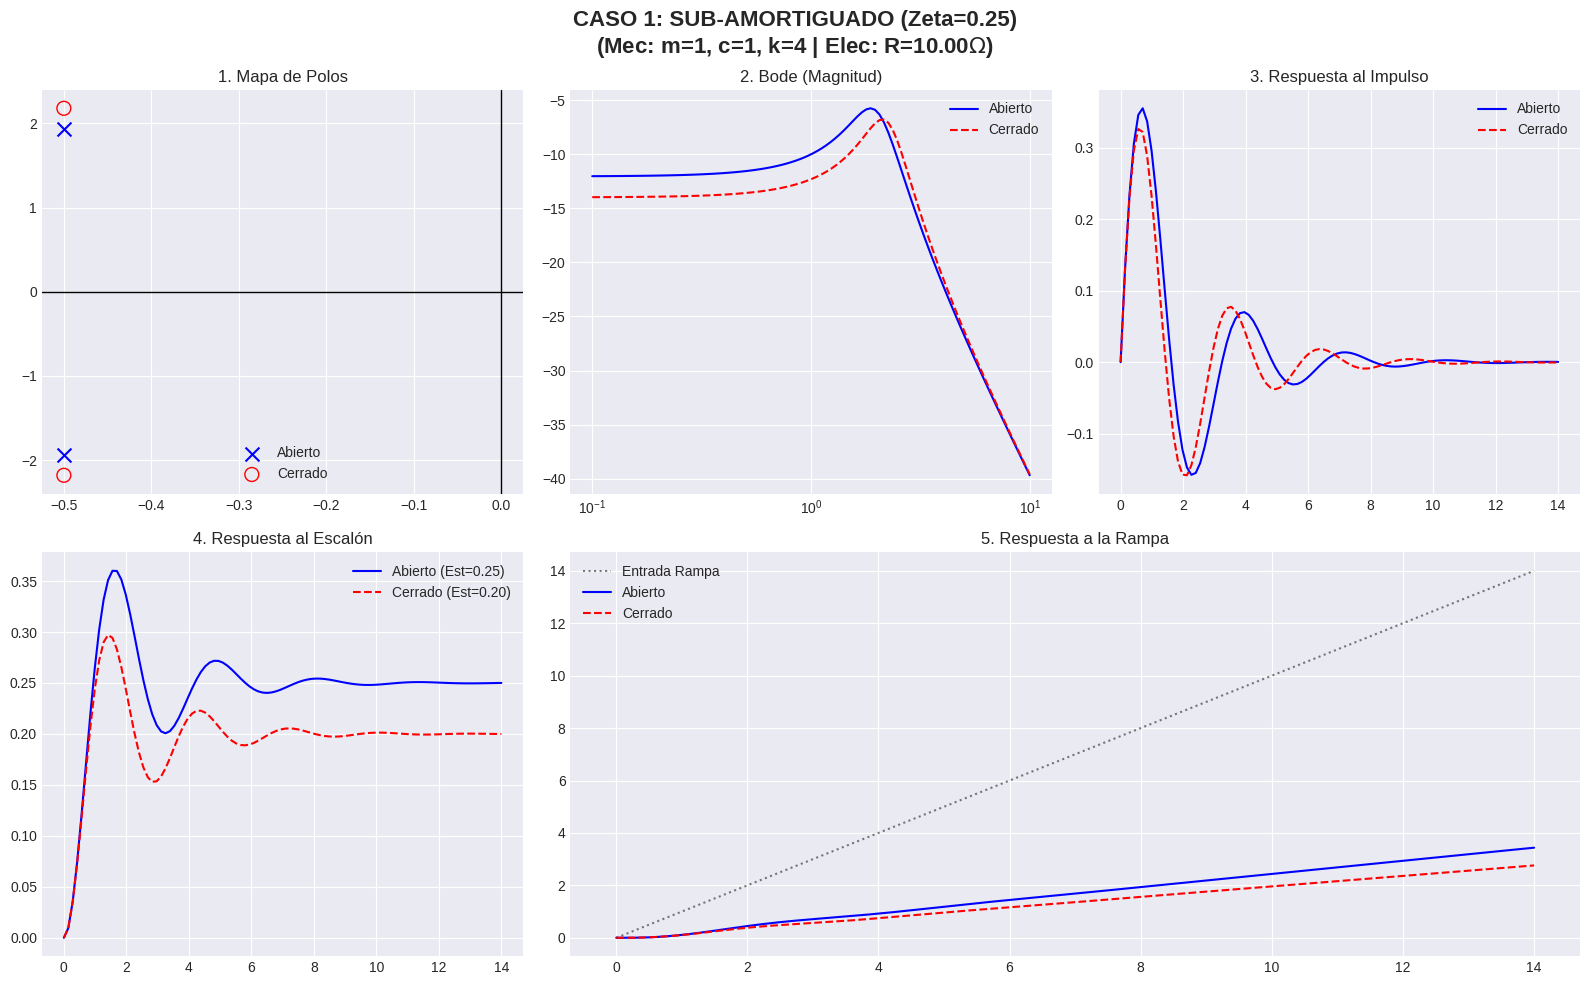


>>> ANÁLISIS: CASO 2: CRÍTICO (Zeta=1.0)
Equivalentes Eléctricos: R=2.50Ω, L=2.5H, C=0.1F
--- Lazo Abierto ---
  Polos: [-2. -2.]
  Zeta (amortiguamiento): 1.0000
  Wn (Frec. Natural): 2.0000 rad/s
  Tp (Tiempo Pico): inf s
  Tr (Tiempo Subida): 1.1000 s
  Ts (Tiempo Establecimiento): 2.0000 s
------------------------------
--- Lazo Cerrado ---
  Polos: [-2.+1.j -2.-1.j]
  Zeta (amortiguamiento): 0.8944
  Wn (Frec. Natural): 2.2361 rad/s
  Wd (Frec. Amortiguada): 1.0000 rad/s
  Tp (Tiempo Pico): 3.1416 s
  Tr (Tiempo Subida): 2.6779 s
  Ts (Tiempo Establecimiento): 2.0000 s
------------------------------


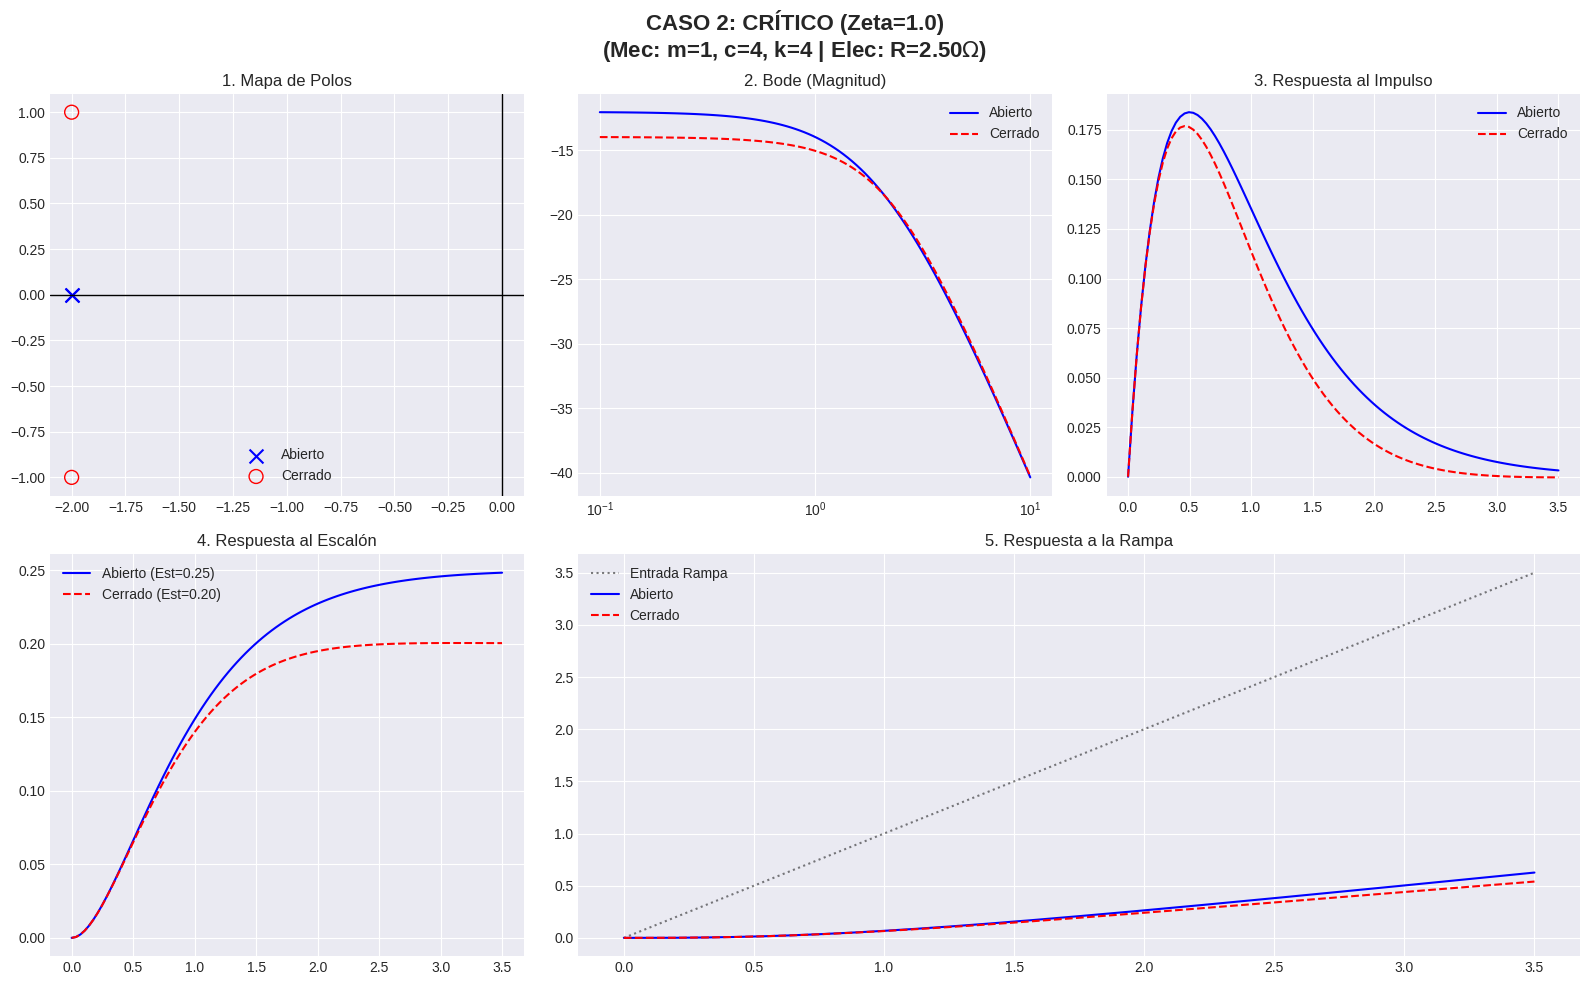


>>> ANÁLISIS: CASO 3: SOBRE-AMORTIGUADO (Zeta=2.0)
Equivalentes Eléctricos: R=1.25Ω, L=2.5H, C=0.1F
--- Lazo Abierto ---
  Polos: [-7.464 -0.536]
  Zeta (amortiguamiento): 1.0000
  Wn (Frec. Natural): 7.4641 rad/s
  Tp (Tiempo Pico): inf s
  Tr (Tiempo Subida): 0.2947 s
  Ts (Tiempo Establecimiento): 0.5359 s
------------------------------
--- Lazo Cerrado ---
  Polos: [-7.317 -0.683]
  Zeta (amortiguamiento): 1.0000
  Wn (Frec. Natural): 7.3166 rad/s
  Tp (Tiempo Pico): inf s
  Tr (Tiempo Subida): 0.3007 s
  Ts (Tiempo Establecimiento): 0.5467 s
------------------------------


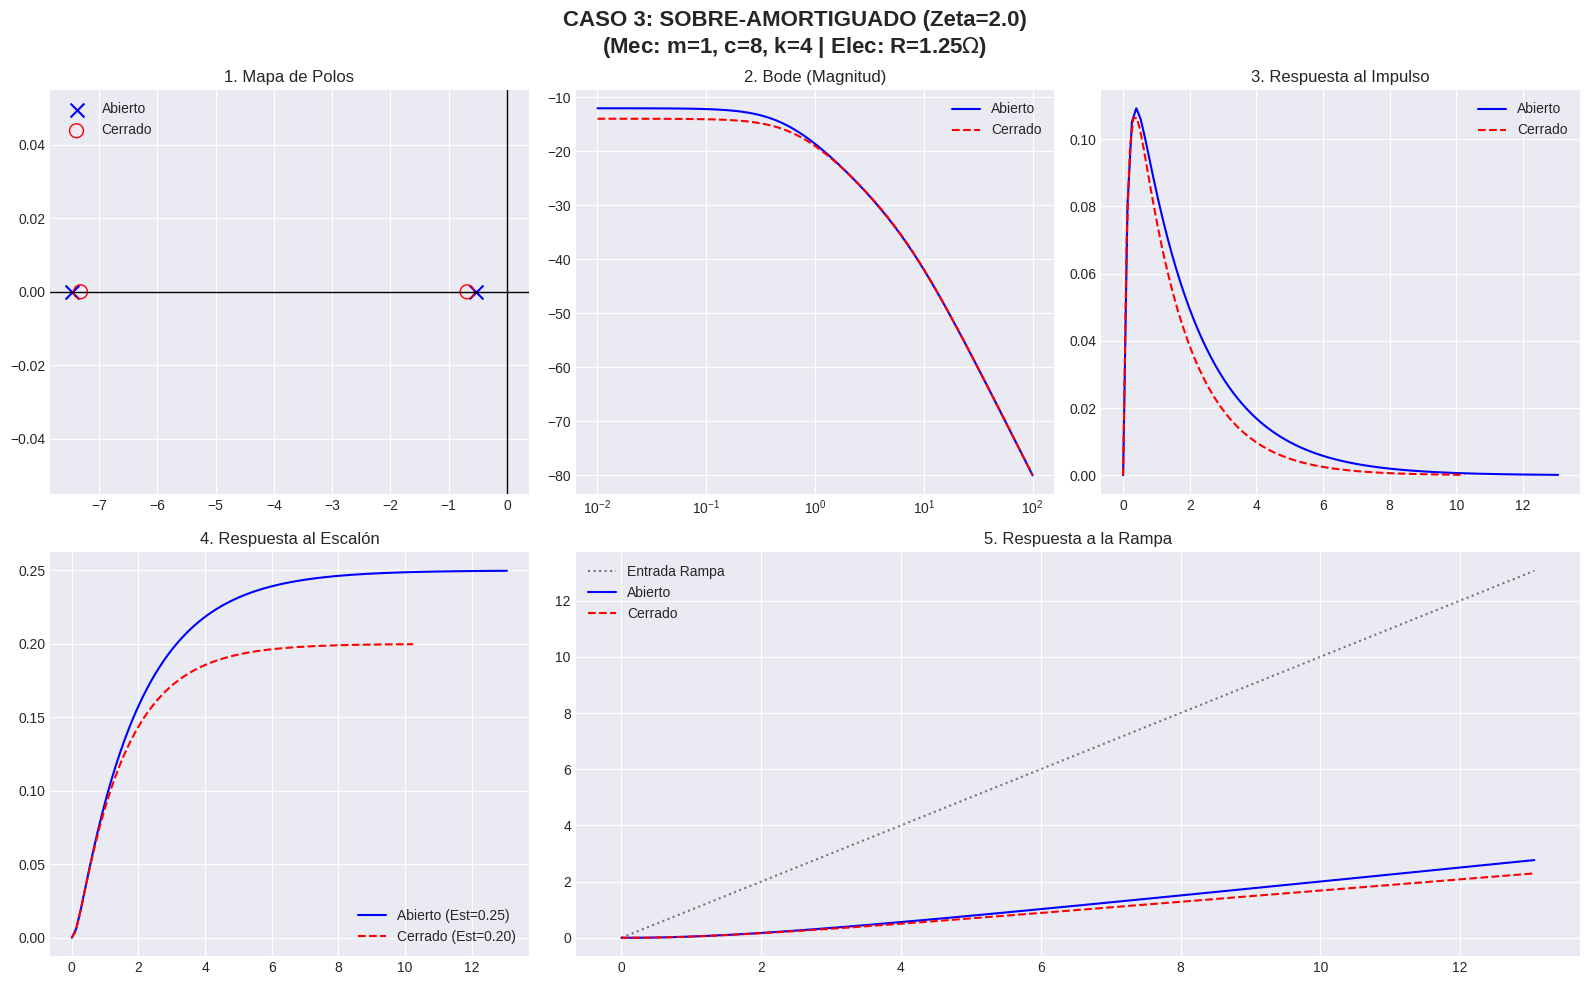

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# ==========================================
# 1. DEFINICIÓN DE CLASES Y FUNCIONES
# ==========================================
def calcular_metricas(sistema, nombre_caso):
    """Calcula parámetros del sistema de 2do orden automáticamente"""
    # Polos para hallar wn y zeta
    polos = sistema.poles
    # Asumimos sistema de 2do orden dominante
    p_dom = polos[0]
    wn = np.abs(p_dom)
    zeta = -np.real(p_dom) / wn
    wd = wn * np.sqrt(1 - zeta**2) if zeta < 1 else 0

    # Métricas temporales (aproximaciones estándar)
    if zeta < 1:
        Tp = np.pi / wd if wd > 0 else np.inf
        Tr = (np.pi - np.arccos(zeta)) / wd if wd > 0 else np.inf
    else:
        Tp = np.inf # No hay pico real en sobreamortiguado
        Tr = 2.2 / wn # Aprox

    Ts = 4 / (zeta * wn) # Criterio del 2%

    print(f"--- {nombre_caso} ---")
    print(f"  Polos: {np.round(polos, 3)}")
    print(f"  Zeta (amortiguamiento): {zeta:.4f}")
    print(f"  Wn (Frec. Natural): {wn:.4f} rad/s")
    if zeta < 1: print(f"  Wd (Frec. Amortiguada): {wd:.4f} rad/s")
    print(f"  Tp (Tiempo Pico): {Tp:.4f} s")
    print(f"  Tr (Tiempo Subida): {Tr:.4f} s")
    print(f"  Ts (Tiempo Establecimiento): {Ts:.4f} s")
    print("-" * 30)
    return wn, zeta

def graficar_sistema(m, k, c, R_eq, titulo_caso):
    """
    Genera el dashboard de 5 gráficas para un caso específico.
    Incluye Lazo Abierto (OL) y Lazo Cerrado (CL).
    """
    # --- SISTEMA LAZO ABIERTO (G) ---
    # G(s) = 1 / (ms^2 + cs + k)
    sys_ol = signal.TransferFunction([1], [m, c, k])

    # --- SISTEMA LAZO CERRADO (T) ---
    # T(s) = G / (1+G) = 1 / (ms^2 + cs + (k+1))
    # Feedback unitario negativo aumenta la "rigidez" aparente en 1 unidad
    sys_cl = signal.TransferFunction([1], [m, c, k + 1])

    # Cálculo de métricas para imprimir en consola
    print(f"\n>>> ANÁLISIS: {titulo_caso}")
    print(f"Equivalentes Eléctricos: R={R_eq:.2f}Ω, L=2.5H, C=0.1F")
    calcular_metricas(sys_ol, "Lazo Abierto")
    calcular_metricas(sys_cl, "Lazo Cerrado")

    # Vectores de tiempo
    t_step, y_step = signal.step(sys_ol)
    t_imp, y_imp = signal.impulse(sys_ol)

    # Rampa: La respuesta a rampa es la integral del escalón o lsim con t
    t_ramp = np.linspace(0, t_step[-1], 1000)
    u_ramp = t_ramp
    tout_ramp, y_ramp, _ = signal.lsim(sys_ol, u_ramp, t_ramp)

    # --- GRAFICACIÓN ---
    plt.style.use('seaborn-v0_8-darkgrid')
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle(f'{titulo_caso}\n(Mec: m={m}, c={c}, k={k} | Elec: R={R_eq:.2f}$\Omega$)', fontsize=16, weight='bold')

    # Layout complejo con GridSpec
    gs = fig.add_gridspec(2, 3)

    # 1. Mapa de Polos y Ceros
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.scatter(np.real(sys_ol.poles), np.imag(sys_ol.poles), marker='x', s=100, color='b', label='Abierto')
    ax1.scatter(np.real(sys_cl.poles), np.imag(sys_cl.poles), marker='o', s=100, color='r', facecolors='none', label='Cerrado')
    ax1.axvline(0, color='k', lw=1); ax1.axhline(0, color='k', lw=1)
    ax1.set_title("1. Mapa de Polos")
    ax1.legend()

    # 2. Diagrama de Bode
    ax2 = fig.add_subplot(gs[0, 1])
    w, mag, phase = signal.bode(sys_ol)
    w_cl, mag_cl, phase_cl = signal.bode(sys_cl)
    ax2.semilogx(w, mag, 'b', label='Abierto')
    ax2.semilogx(w_cl, mag_cl, 'r--', label='Cerrado')
    ax2.set_title("2. Bode (Magnitud)")
    ax2.legend()

    # 3. Respuesta al Impulso
    ax3 = fig.add_subplot(gs[0, 2])
    t_imp_cl, y_imp_cl = signal.impulse(sys_cl)
    ax3.plot(t_imp, y_imp, 'b', label='Abierto')
    ax3.plot(t_imp_cl, y_imp_cl, 'r--', label='Cerrado')
    ax3.set_title("3. Respuesta al Impulso")
    ax3.legend()

    # 4. Respuesta al Escalón
    ax4 = fig.add_subplot(gs[1, 0])
    t_step_cl, y_step_cl = signal.step(sys_cl)
    ax4.plot(t_step, y_step, 'b', label=f'Abierto (Est={1/k:.2f})')
    ax4.plot(t_step_cl, y_step_cl, 'r--', label=f'Cerrado (Est={1/(k+1):.2f})')
    ax4.set_title("4. Respuesta al Escalón")
    ax4.legend()

    # 5. Respuesta a la Rampa
    ax5 = fig.add_subplot(gs[1, 1:])
    tout_ramp_cl, y_ramp_cl, _ = signal.lsim(sys_cl, u_ramp, t_ramp)
    ax5.plot(t_ramp, u_ramp, 'k:', label='Entrada Rampa', alpha=0.5)
    ax5.plot(t_ramp, y_ramp, 'b', label='Abierto')
    ax5.plot(t_ramp, y_ramp_cl, 'r--', label='Cerrado')
    ax5.set_title("5. Respuesta a la Rampa")
    ax5.legend()

    plt.tight_layout()
    plt.show()

# ==========================================
# 2. EJECUCIÓN DE LOS 3 CASOS
# ==========================================

# Constantes Fijas: m=1 kg, k=4 N/m (Wn = 2 rad/s)
# Equivalencia Eléctrica base: L = 2.5 H, C = 0.1 F

# CASO A: SUBAMORTIGUADO (Zeta = 0.25 -> c = 1)
# R = 10 / c = 10 Ohms
graficar_sistema(m=1, k=4, c=1, R_eq=10, titulo_caso="CASO 1: SUB-AMORTIGUADO (Zeta=0.25)")

# CASO B: CRÍTICAMENTE AMORTIGUADO (Zeta = 1.0 -> c = 4)
# R = 10 / c = 2.5 Ohms
graficar_sistema(m=1, k=4, c=4, R_eq=2.5, titulo_caso="CASO 2: CRÍTICO (Zeta=1.0)")

# CASO C: SOBREAMORTIGUADO (Zeta = 2.0 -> c = 8)
# R = 10 / c = 1.25 Ohms
graficar_sistema(m=1, k=4, c=8, R_eq=1.25, titulo_caso="CASO 3: SOBRE-AMORTIGUADO (Zeta=2.0)")


Efecto del **Lazo Cerrado**:

1.  **Lazo Cerrado (Gráficas Rojas):**

  * Verás que el sistema en lazo cerrado siempre es **más rápido** (polos más lejos del origen) pero tiene **menor ganancia** (en el escalón llega más abajo).
  * Matemáticamente, al cerrar el lazo con realimentación unitaria, la rigidez efectiva cambia de $k$ a $k+1$.
  * Esto aumenta la Frecuencia Natural: $\omega_{n,closed} = \sqrt{\frac{k+1}{m}}$.

2.  **Caso Subamortiguado (Gráfica 1):**

      * **Polos:** Complejos conjugados.
      * **Escalón:** Mucho sobrepico (oscila).
      * **Bode:** Tiene un pico de resonancia visible.

3.  **Caso Crítico (Gráfica 2):**

      * **Polos:** Dos polos reales repetidos en el mismo punto.
      * **Escalón:** Sube lo más rápido posible *sin* pasarse (sin sobrepico). Es el diseño ideal para muchas máquinas.

4.  **Caso Sobreamortiguado (Gráfica 3):**

      * **Polos:** Dos polos reales distintos y separados.
      * **Escalón:** Sube lento y perezoso.
      * **Rampa:** Tiene mucho error de seguimiento (la distancia entre la línea negra punteada y la curva azul/roja es grande).